<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Licencia Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">Python en ciencias e ingeniería: tutoriales basados en ejemplos</span> por <span xmlns:cc="http://creativecommons.org/ns#" property="cc:attributionName">Sergio Gutiérrez Rodrigo y Adrián Navas Montilla</span> se distribuye bajo una <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Licencia Creative Commons Atribución-NoComercial-CompartirIgual 4.0 Internacional</a>.

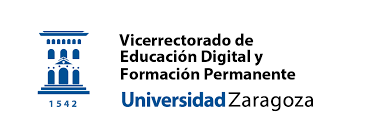

---
Producción de contenidos educativos digitales UNIZAR 2022-2023

**Objetos de aprendizaje abiertos del Vicerrectorado de Educación Digital y Formación Permanente de la Universidad de Zaragoza en el marco del Proyecto UniProducción incluido en el Plan UniDigital.**
---



## <center> Resolución numérica de la ecuación del calor  </center>


-----------------------------------------

## Introducción al método de las diferencias finitas


### Derivadas discretas (aproximadas)

La aproximación por diferencias finitas es el más antiguo de los métodos aplicados para obtener soluciones numéricas de ecuaciones diferenciales. La primera utilización de este método se atribuye a Leonhard Euler en 1768. La idea de los métodos de diferencias finitas es en realidad bastante simple, ya que corresponde a una estimación de una derivada mediante la diferencia discreta del valor de la función en dos puntos cercanos.

La derivada de una función $u(x)$ en $x$ se define como:

$$
	\frac{\partial u }{\partial x} = \lim_{\Delta x \rightarrow 0} \frac{u(x+\Delta x) - u(x)}{\Delta x} \,.
$$


Si quitamos el límite de $\Delta x \rightarrow 0$ en la expresión anterior, considerando un $\Delta x$ finito, entonces obtendremos el concepto de derivada discreta como una diferencia finita. Ésta se calculará como el ratio de la diferencia de la función evaluada en $x+\Delta x$ y $x$ respecto de $\Delta x$.

En el caso de utilizar una diferencia finita, se cometerá cierto error y éste se puede derivar utilizando una expansión en serie de Taylor:

$$
u(x+\Delta x )=u(x)+\left(\frac{\partial u}{\partial x}\right)\Delta x+\left(\frac{\partial^2 u}{\partial x^2}\right)\frac{\Delta x^2}{2} +\left(\frac{\partial^3 u}{\partial x^3}\right)\frac{\Delta x^3}{6} + ...\,\,,
$$

Despejando la primera derivada de la expresión anterior obtenemos:


$$
\left(\frac{\partial u}{\partial x}\right)= \frac{u(x+\Delta x) - u(x)}{\Delta x} -\underbrace{\left(\frac{\partial^2 u}{\partial x^2}\right)\frac{\Delta x}{2} -\left(\frac{\partial^3 u}{\partial x^3}\right)\frac{\Delta x^2}{6} - ...}_{\mbox{error de truncamiento}}\,\,,
$$

lo que permite expresar la aproximación de la primera derivada como:

$$
	\frac{\partial u }{\partial x} \approx  \frac{u(x+\Delta x) - u(x)}{\Delta x}  \, .
$$

En 1D, vamos a considerar un dominio espacial $[0,L]$ que se discretizará en $N=L/\Delta x+1$ nodos localizados en las coordenadas $x_i=i\Delta x$, con $\Delta x$ el paso de discretización espacial. En los puntos de la malla, se aproximarán las variables como $u_i \approx u(x_i)$


Generalmente, se usan dos tipos de aproximación de las derivadas espaciales en función de qué información cojamos:

- Diferencias regresivas (hacia atrás):

$$
	\frac{\partial u }{\partial x} \approx  \frac{u_{i} - u_{i-1}}{\Delta x}  \, .
$$

- Diferencias progresivas (hacia adelante):


$$
	\frac{\partial u }{\partial x} \approx  \frac{u_{i+1} - u_{i}}{\Delta x}  \, .
$$

En el caso de tener que aproximar una derivada segunda, podemos combinar ambas para obtener:

$$
	\frac{\partial ^2 u }{\partial x^2} \approx  \frac{\frac{u_{i+1} - u_{i}}{\Delta x} - \frac{u_{i} - u_{i-1}}{\Delta x}}{\Delta x} = \frac{u_{i+1} -2u_{i} +u_{i-1}}{\Delta x^2} \, .
$$


### Resolución numérica de la ecuación del calor

Ahora vamos a utilizar las expresiones anteriores de derivadas discretas para resolver la ecuación del calor en 1D sin generación:

$$
\rho c	\frac{\partial T }{\partial t} =  \frac{\partial  }{\partial x}	\left( k\frac{\partial T }{\partial x} \right) \, .
$$

Asumiendo que $\rho$, $c$ y $k$ son constantes,  podemos reescribir la ecuación de forma compacta como

$$
	\frac{\partial T }{\partial t} =  b	\frac{\partial ^2 T }{\partial x^2}\, .
$$

con $b=k/(\rho c)$ la difusividad térmica. El problema se define en un dominio $[0,L]$ hasta un tiempo $t$, considerando también una condición inicial $T(x,0)=T_0(x)$ y unas condiciones de contorno $T(0,t)=T_L$ y $T(L,t)=T_R$.

Para resolver el problema, el primer paso es expresar la ecuación diferencial de manera discreta, utilizando una la aproximación progresiva para el tiempo y la derivada central para el espacio:

$$
\frac{T_{i}^{n+1}-T_{i}^{n}}{\Delta t}=b\frac{T_{i+1}^{n}-2T_{i}^{n}+T_{i-1}^{n}}{\Delta x^2}
$$

donde $n$ y $n+1$ son dos instantes consecutivos de tiempo tal que $t^n=n\Delta t $, mientras que, $i-1$ y $i$ son dos puntos vecinos de la coordenada $x$ discretizada. Si se dan las condiciones iniciales, entonces la única incógnita en esta discretización es $u_i^{n+1}$. Por lo tanto, podemos actualizar el valor de la temperatura en cada punto utilizando la siguiente expresión:

$$
T_{i}^{n+1}=T_{i}^{n}+ b\frac{\Delta t}{\Delta x^2} \left(T_{i+1}^{n}-2T_{i}^{n}+T_{i-1}^{n}\right)
$$

Pero...

- ¿Con qué valores de $T_{i}$ empezamos en el tiempo $t=0$, es decir, en $n=0$? Impondremos la condición inicial:
$$T_{i}^{0}=T(x_i)$$

- ¿Qué ocurre cuando queremos caluclar la temperatura en el primer nodo ($i=0$) o en el último? Entonces no podemos utilizar la expresión general anterior ya que nos falta información de lo que hay al otro lado del contorno. En este caso, impondremos las condiciones de contorno.  En el caso más sencillo, cuando nos dan la temperatura en los extremos, tendremos condiciones de contorno de tipo Dirichlet y bastará con hacer:
$$T_{0}^{n+1}=T_L$$
$$T_{N-1}^{n+1}=T_R$$
donde $T_L$ y $T_R$ son los valores de temperatura en los extremos izquierdo (L, left)y derecho (R, right), que son dato del problema.

Y una última cuestión... debemos elegir el valor de $\Delta t$. Para que el método numérico funcione adecuadamente y no se vuelva inestable, este valor no se puede escoger de forma arbitraria. Lo calcularemos de la siguiente manera:

$$ \Delta t=\sigma \frac{\Delta x^2}{b}$$

donde $\sigma$ es una constante que debe estar dentro de unos límites. A esto lo denominamos *condición de Courant–Friedrichs–Lewy (CFL)*.

## Trabajo práctico
### Primer paso: cargar librerías de Python

Para comenzar, debemos cargar todos los paquetes de Python necesarios:

In [ ]:
import numpy as np              # Librería para cálculo numérico
import math                     # Librería para utilizar símbolos matemáticos como el número pi, que se escribe como math.pi
from scipy import special
import matplotlib.pyplot as plt # Librería para poder dibujar gráficas
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

### Apartado 1: Primeros pasos para la resolución de la ecuación del calor

Para comenzar, se pide resolver el siguiente problema

$$
	\frac{\partial T }{\partial t} =  b	\frac{\partial ^2 T }{\partial x^2}\, .
$$

con $b=0.3$ m$^2$/s en un dominio $[0,2]$ m hasta un tiempo $t=0.2$ s, dada una condición inicial

$$ T(x,0)=\left\{ \begin{array}{l}
2 \hbox{ ºC si } x<1 \\
1 \hbox{ ºC si } x\geq 1
\end{array}\right.$$

y unas condiciones de contorno $T(0,t)=2$ ºC y $T(L,t)=1$ ºC. Para ello, se utilizará el esquema en diferencias finitas expuesto arriba, que nos permite calcular la evolución de la temperatura a o largo del tiempo.

Se pide lo siguiente:

1.a) Completa el código inferior para resolver el problema propuesto, utilizando las expresiones anteriores.

1.b) Completa la gráfica y observa el resultado.

1.c) Prueba distintos valores de $N$ y de $b$ y observa la solución.

1.d) Prueba $\sigma=0.05$ y $\sigma=0.9$ y explica qué ocurre. Encuentra (probando) el valor aproximado de $\sigma$ para el cual la solución deja de ser estable y se vuelve oscilatoria.




La longitud del dominio es: 2.0
El numero de nodos espaciales es: 20
El numero de pasos temporales es: 18
El paso de tiempo es es: 0.011080332409972297
El tiempo final es: 0.18836565096952906



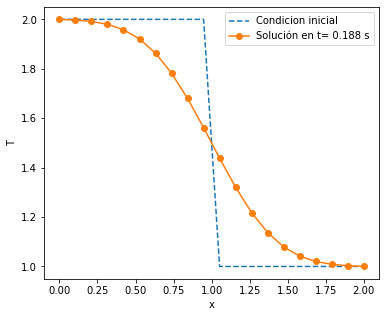

In [ ]:
#Primero definimos los parámetros del problema

L = 2.0  #longitud del dominio en x
N = 20   #numero de nodos espaciales en x
dx = L/(N-1)
tf = 0.2  #tiempo final que queremos simular
b  = 0.3   # valor de la conductividad térmica
sigma = 0.3 #sigma es un parametro que controla la estabilidad del metodo numérico

#después calculamos el paso de tiempo y el numero de pasos necesario
dt = sigma*dx**2/b #se calcula el paso de tiempo para la integración temporal

nt=int(tf/dt) # número de pasos de tiempo necesarios


print("La longitud del dominio es:",L)
print("El numero de nodos espaciales es:",N)
print("El numero de pasos temporales es:",nt)
print("El paso de tiempo es es:",dt)
print("El tiempo final es:",(nt-1)*dt)
print()

#inicializamos los arrays
x = np.zeros(N)
t = np.zeros(nt)
T = np.zeros((nt, N))

#damos valores a las posiciones espaciales
for i in range(N):
    x[i]=dx*i

#damos valores a los tiempos
for i in range(nt):
    t[i]=dt*i

#definimos la condición inicial
def initial_condition1(x):
    return np.piecewise(x, [x < 1, x >= 1], [2, 1])

#imponemos la condición inicial en el tiempo "cero"
T[0,:] = initial_condition1(x)

#calculo de evolución de la temperatura en el tiempo
for n in range(0,nt-1): #bucle temporal
    for i in range(1, N-1): #bucle espacial entre 1 y N-2 (sin incluir primer y ultimo nodo)
        T[n + 1, i] = T[n,i] + b*dt/dx**2 * (T[n,i+1] + T[n,i-1] - 2*T[n,i])
    #condiciones de contorno en primer y ultimo nodo
    T[n + 1, 0]=2
    T[n + 1, N-1]=1

n=nt-1 #instante de tiempo en el que pinto la solución

fig, ax1 = plt.subplots(figsize=(6, 5))
ax1.plot(x,T[0, :],'--',label='Condicion inicial')
ax1.plot(x,T[n,:],'-o',label=f'Solución en t= {(n)*dt:.3f} s')
ax1.set_xlabel("x")
ax1.set_ylabel("T")
ax1.legend()

Ahora vamos a hacer una representación de la temperatura en función del espacio y del tiempo.

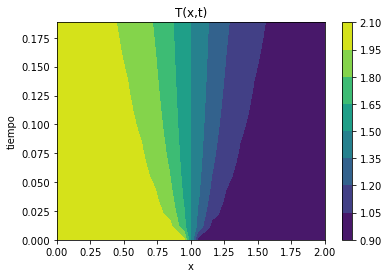

In [ ]:
XX, TT = np.meshgrid(x, t)

fig, ax = plt.subplots()
CS = ax.contourf(XX, TT, T)
ax.set_title('T(x,t)')
ax.set_xlabel("x")
ax.set_ylabel("tiempo")
plt.colorbar(CS)

Con esto hacemos una animación de la solución:



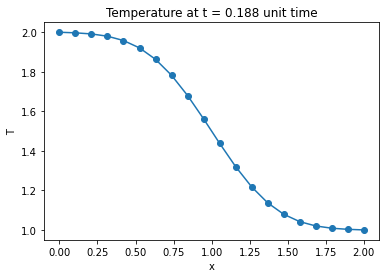

In [ ]:
def pintar_solucion(T_n, n):
    # Clear the current plot figure
    plt.clf()
    plt.title(f"Temperature at t = {n*dt:.3f} unit time")
    plt.xlabel("x")
    plt.ylabel("T")
    plt.plot(x,T_n,'-o')
    return plt

def animate(n):
    pintar_solucion(T[n], n)

anim = animation.FuncAnimation(plt.figure(), animate, interval=100, frames=nt, repeat=False)
#anim.save("heat_equation_solution.gif")

HTML(anim.to_html5_video())

Ahora debemos comprobar el resultado que hemos obtenido. Para ello, podemos compararlo con la solución analítica para este mismo problema:

$$ T(x,t)=1.5-0.5erf\left(\frac{x-1}{2\sqrt{bt}}\right)$$

donde $erf()$ es la función de error que se calcula utilizando ```special.erf()```. Se pide:

1.d) Calcula la solución exacta en el tiempo final, almacénala en un array ```T_exacta``` y represéntala gráficamente junto a la solución numérica.

1.e) Calcula el error de la aproximación numérica en cada punto y almacénalo en un vector:

$$ \epsilon_i=\left|T_i-T_{exacta}(x_i)\right| $$

y después calcula el máximo de ese vector

$$L_{\infty}= \max(\epsilon)$$

A este valor lo llamamos "norma infinito del error" y nos da una medida del error máximo cometido por la aproximación numérica.

1.f) Repite este cálculo para distintos valores de N y explica: ¿Cómo cambia el error al variar N? (no hay que escribir más codigo, simplemente prueba varios valores de N ejecutando lo que ya tienes y explica los resultados)

0.3


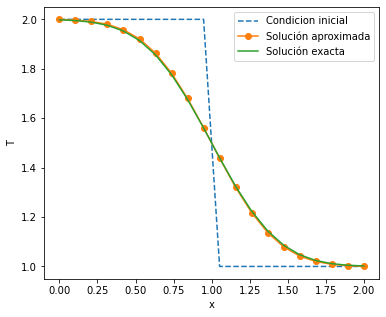

In [ ]:
T_exacta = np.zeros(N)
error    = np.zeros(N)

print(b)
T_exacta = 1.5-0.5*special.erf((x-1)/(2*np.sqrt(b*tf)))

fig, ax1 = plt.subplots(figsize=(6, 5))
ax1.plot(x,T[0, :],'--',label='Condicion inicial')
ax1.plot(x,T[nt-1,:],'-o',label=f'Solución aproximada')
ax1.plot(x,T_exacta,'-',label='Solución exacta')
ax1.set_xlabel("x")
ax1.set_ylabel("T")
ax1.legend()